# Análisis Exploratorio de Datos (EDA)
## Dataset: YouToxic English 1000

Este notebook contiene el análisis exploratorio del dataset de comentarios tóxicos de YouTube.


## 1. Importación de librerías

Primero importamos las librerías necesarias para el análisis.


In [7]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas para ver más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)


## 2. Carga de datos

Cargamos el dataset desde el archivo CSV.


In [8]:
# Cargar el dataset
df = pd.read_csv('../data/raw/youtoxic_english_1000.csv')

# Ver las primeras filas
print("Primeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,"If only people would just take a step back and not make this case about them, because it wasn't ...",False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to apprehend. They are trained to shoot to kill. And I...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' banners being held by white cunts is kinda patroniz...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do not like police officers. They are called Crimina...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should have not been shot 6 extra time. Shoot him once if ...",False,False,False,False,False,False,False,False,False,False,False,False


## 3. Información básica del dataset

Vamos a explorar las dimensiones, tipos de datos y estructura general del dataset.


In [9]:
# Dimensiones del dataset (filas, columnas)
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Dimensiones del dataset: (1000, 15)
Número de filas: 1000
Número de columnas: 15


In [10]:
# Información general del dataset
print("Información del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB
None


In [11]:
# Nombres de las columnas
print("Columnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']


In [12]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df)) * 100)


Valores nulos por columna:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

Porcentaje de valores nulos:
CommentId          0.0
VideoId            0.0
Text               0.0
IsToxic            0.0
IsAbusive          0.0
IsThreat           0.0
IsProvocative      0.0
IsObscene          0.0
IsHatespeech       0.0
IsRacist           0.0
IsNationalist      0.0
IsSexist           0.0
IsHomophobic       0.0
IsReligiousHate    0.0
IsRadicalism       0.0
dtype: float64


## 4. Análisis de las etiquetas de toxicidad

Vamos a analizar la distribución de las diferentes etiquetas de toxicidad en el dataset.


In [13]:
# Identificar todas las columnas de etiquetas (todas las que empiezan con "Is")
label_columns = [col for col in df.columns if col.startswith('Is')]
print("Columnas de etiquetas de toxicidad:")
print(label_columns)


Columnas de etiquetas de toxicidad:
['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']


In [14]:
# Contar cuántos comentarios tienen cada etiqueta activa (True)
print("Distribución de etiquetas (cantidad de comentarios con cada etiqueta = True):")
for col in label_columns:
    count = df[col].sum()
    percentage = (count / len(df)) * 100
    print(f"{col}: {count} ({percentage:.2f}%)")


Distribución de etiquetas (cantidad de comentarios con cada etiqueta = True):
IsToxic: 462 (46.20%)
IsAbusive: 353 (35.30%)
IsThreat: 21 (2.10%)
IsProvocative: 161 (16.10%)
IsObscene: 100 (10.00%)
IsHatespeech: 138 (13.80%)
IsRacist: 125 (12.50%)
IsNationalist: 8 (0.80%)
IsSexist: 1 (0.10%)
IsHomophobic: 0 (0.00%)
IsReligiousHate: 12 (1.20%)
IsRadicalism: 0 (0.00%)


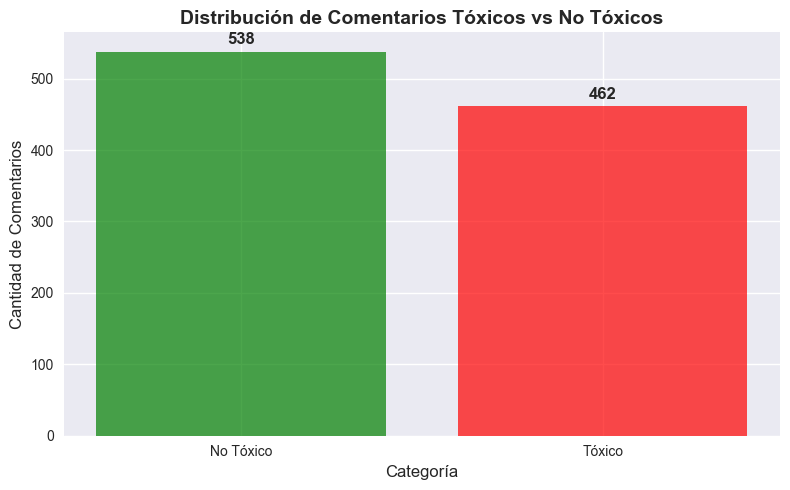


Comentarios tóxicos: 462 (46.20%)
Comentarios no tóxicos: 538 (53.80%)


In [15]:
# Visualización: Distribución de la etiqueta principal IsToxic
plt.figure(figsize=(8, 5))
toxic_counts = df['IsToxic'].value_counts()
plt.bar(['No Tóxico', 'Tóxico'], toxic_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Comentarios Tóxicos vs No Tóxicos', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Comentarios', fontsize=12)
plt.xlabel('Categoría', fontsize=12)

# Agregar los valores en las barras
for i, v in enumerate(toxic_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nComentarios tóxicos: {toxic_counts.get(True, 0)} ({toxic_counts.get(True, 0)/len(df)*100:.2f}%)")
print(f"Comentarios no tóxicos: {toxic_counts.get(False, 0)} ({toxic_counts.get(False, 0)/len(df)*100:.2f}%)")


### 4.1 Visualización de todas las etiquetas de toxicidad


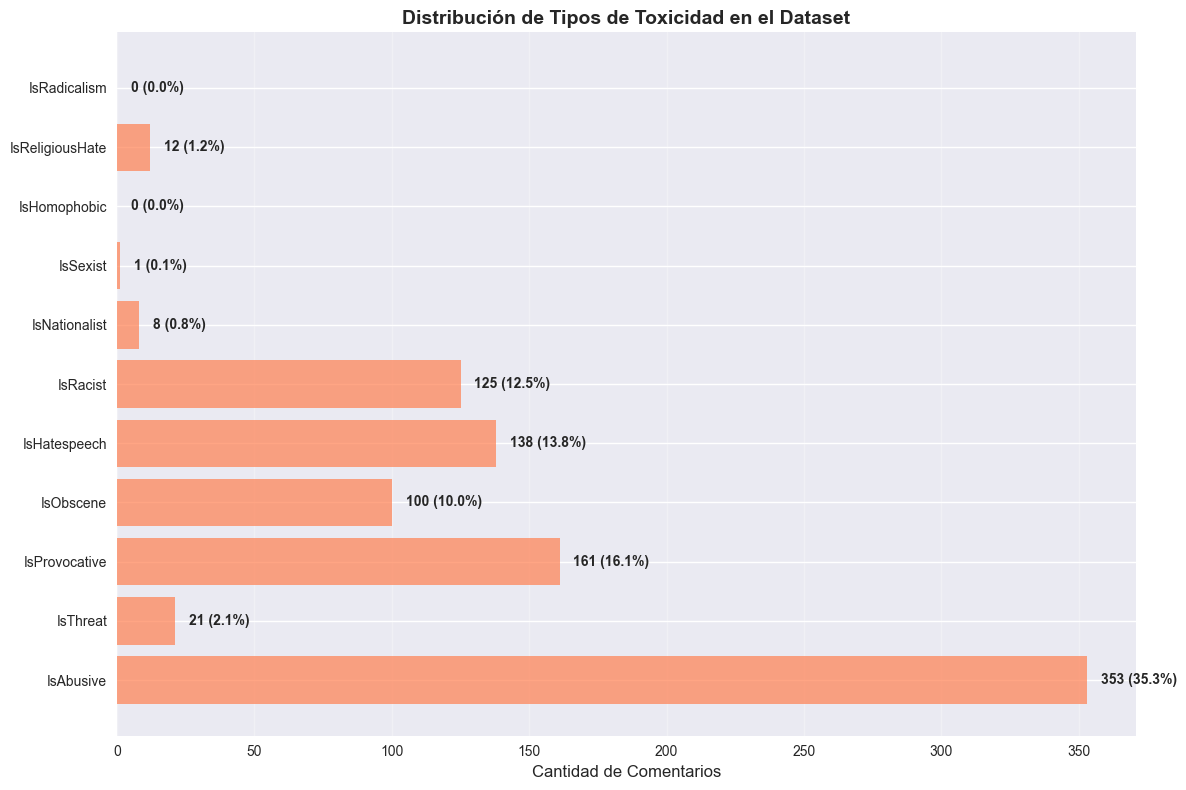

In [16]:
# Crear un gráfico de barras horizontal con todas las etiquetas (excluyendo IsToxic que ya vimos)
sub_labels = [col for col in label_columns if col != 'IsToxic']
counts = [df[col].sum() for col in sub_labels]
percentages = [(count / len(df)) * 100 for count in counts]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(sub_labels, counts, color='coral', alpha=0.7)

# Agregar los valores en las barras
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(count + 5, i, f'{count} ({pct:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Cantidad de Comentarios', fontsize=12)
ax.set_title('Distribución de Tipos de Toxicidad en el Dataset', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### 4.2 Análisis de solapamiento entre etiquetas


In [17]:
# Calcular cuántas etiquetas tiene cada comentario
df['num_labels'] = df[label_columns].sum(axis=1)

print("Distribución del número de etiquetas por comentario:")
print(df['num_labels'].value_counts().sort_index())

print(f"\nComentarios sin ninguna etiqueta: {(df['num_labels'] == 0).sum()}")
print(f"Comentarios con al menos una etiqueta: {(df['num_labels'] > 0).sum()}")
print(f"Comentarios con múltiples etiquetas: {(df['num_labels'] > 1).sum()}")


Distribución del número de etiquetas por comentario:
num_labels
0    538
2    100
3    294
4     47
5     15
6      6
Name: count, dtype: int64

Comentarios sin ninguna etiqueta: 538
Comentarios con al menos una etiqueta: 462
Comentarios con múltiples etiquetas: 462


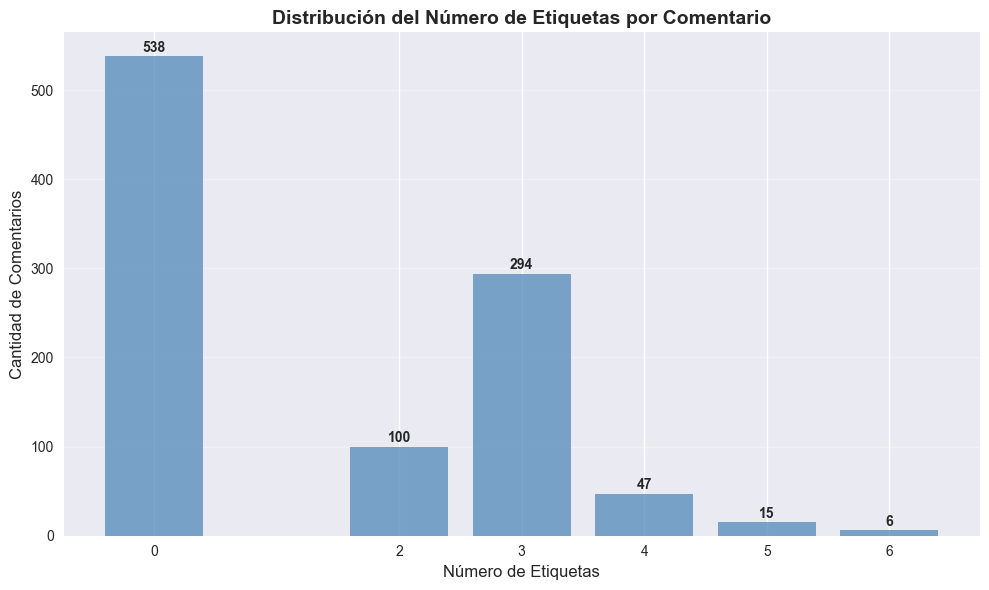

In [18]:
# Visualización: Distribución del número de etiquetas
plt.figure(figsize=(10, 6))
label_dist = df['num_labels'].value_counts().sort_index()
plt.bar(label_dist.index, label_dist.values, color='steelblue', alpha=0.7)
plt.xlabel('Número de Etiquetas', fontsize=12)
plt.ylabel('Cantidad de Comentarios', fontsize=12)
plt.title('Distribución del Número de Etiquetas por Comentario', fontsize=14, fontweight='bold')
plt.xticks(label_dist.index)

# Agregar valores en las barras
for i, v in enumerate(label_dist.values):
    plt.text(label_dist.index[i], v + 5, str(v), ha='center', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


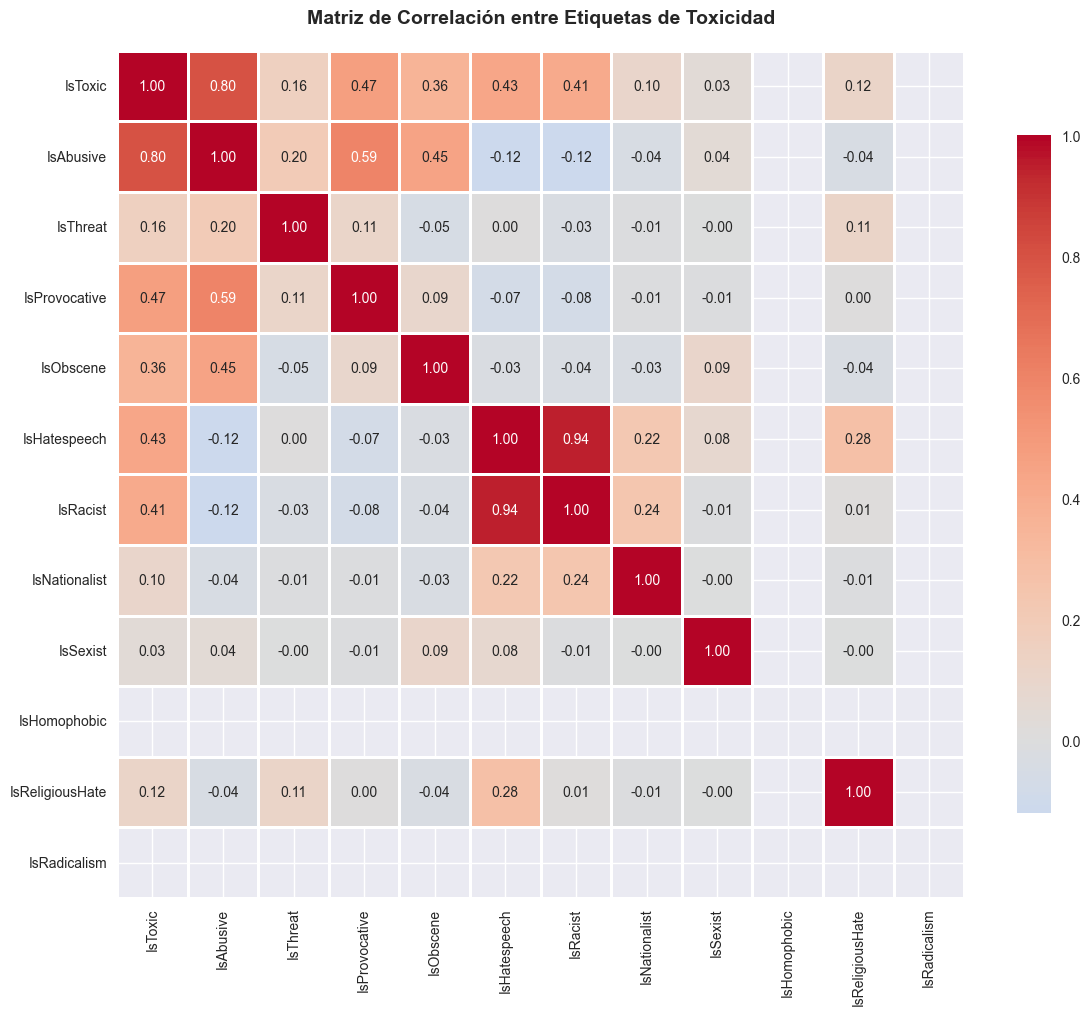

In [19]:
# Matriz de correlación entre etiquetas (para ver qué etiquetas suelen aparecer juntas)
label_df = df[label_columns]
correlation_matrix = label_df.corr()

# Crear heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Etiquetas de Toxicidad', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. Análisis del texto de los comentarios

Vamos a analizar las características del texto: longitud, número de palabras, etc.


In [20]:
# Calcular características del texto
df['text_length'] = df['Text'].str.len()  # Longitud en caracteres
df['word_count'] = df['Text'].str.split().str.len()  # Número de palabras
df['sentence_count'] = df['Text'].str.count(r'[.!?]+')  # Número aproximado de oraciones

print("Estadísticas descriptivas del texto:")
print(df[['text_length', 'word_count', 'sentence_count']].describe())


Estadísticas descriptivas del texto:
       text_length   word_count  sentence_count
count  1000.000000  1000.000000     1000.000000
mean    185.554000    33.776000        2.442000
std     270.780777    49.069498        3.385868
min       3.000000     1.000000        0.000000
25%      47.000000     9.000000        1.000000
50%     101.000000    19.000000        1.000000
75%     217.000000    39.000000        3.000000
max    4421.000000   815.000000       59.000000


In [21]:
# Comparar características del texto entre comentarios tóxicos y no tóxicos
toxic_text_stats = df[df['IsToxic'] == True][['text_length', 'word_count', 'sentence_count']].describe()
non_toxic_text_stats = df[df['IsToxic'] == False][['text_length', 'word_count', 'sentence_count']].describe()

print("Estadísticas de comentarios TÓXICOS:")
print(toxic_text_stats)
print("\n" + "="*50)
print("Estadísticas de comentarios NO TÓXICOS:")
print(non_toxic_text_stats)


Estadísticas de comentarios TÓXICOS:
       text_length  word_count  sentence_count
count   462.000000  462.000000      462.000000
mean    189.387446   34.603896        2.491342
std     291.061941   53.294876        3.868631
min       6.000000    1.000000        0.000000
25%      54.250000   10.000000        1.000000
50%     110.000000   20.000000        2.000000
75%     220.750000   40.000000        3.000000
max    4421.000000  815.000000       59.000000

Estadísticas de comentarios NO TÓXICOS:
       text_length  word_count  sentence_count
count   538.000000  538.000000      538.000000
mean    182.262082   33.065056        2.399628
std     252.295702   45.165137        2.911187
min       3.000000    1.000000        0.000000
25%      44.000000    8.000000        1.000000
50%      96.000000   18.000000        1.000000
75%     210.750000   38.000000        3.000000
max    2292.000000  418.000000       20.000000


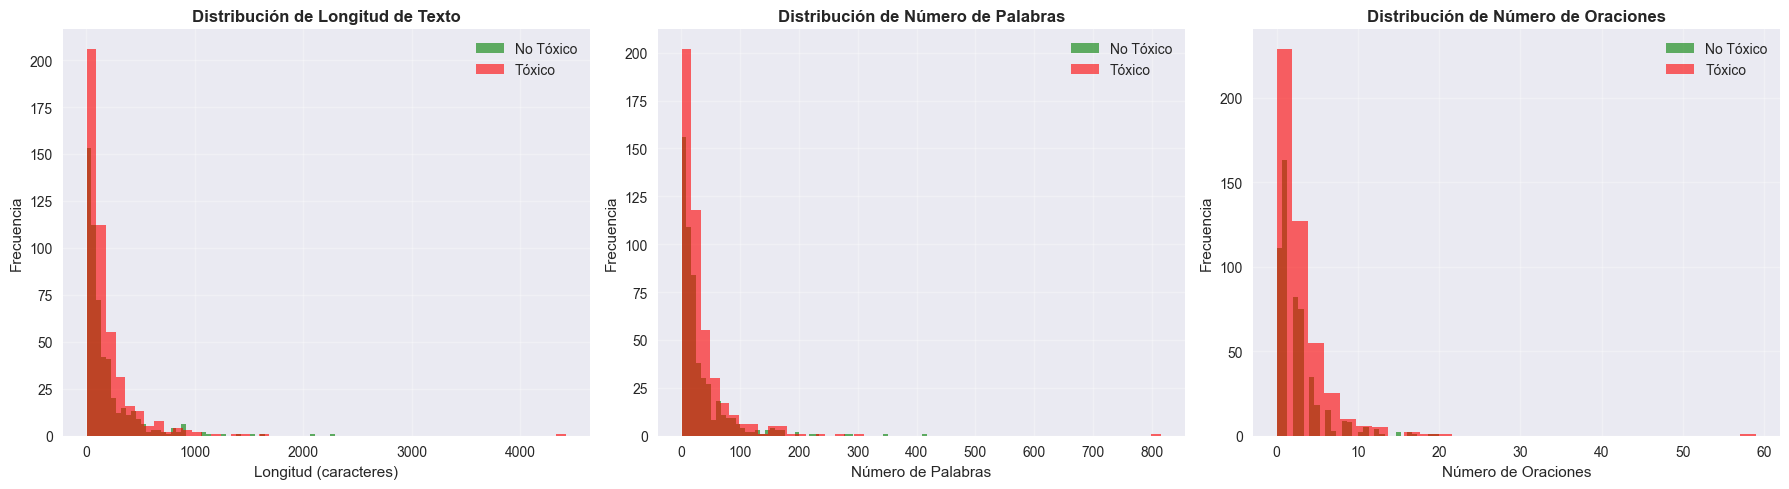

In [22]:
# Visualización: Distribución de longitud de texto
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Longitud en caracteres
axes[0].hist(df[df['IsToxic']==False]['text_length'], bins=50, alpha=0.6, label='No Tóxico', color='green')
axes[0].hist(df[df['IsToxic']==True]['text_length'], bins=50, alpha=0.6, label='Tóxico', color='red')
axes[0].set_xlabel('Longitud (caracteres)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de Longitud de Texto', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Número de palabras
axes[1].hist(df[df['IsToxic']==False]['word_count'], bins=50, alpha=0.6, label='No Tóxico', color='green')
axes[1].hist(df[df['IsToxic']==True]['word_count'], bins=50, alpha=0.6, label='Tóxico', color='red')
axes[1].set_xlabel('Número de Palabras', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title('Distribución de Número de Palabras', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Número de oraciones
axes[2].hist(df[df['IsToxic']==False]['sentence_count'], bins=30, alpha=0.6, label='No Tóxico', color='green')
axes[2].hist(df[df['IsToxic']==True]['sentence_count'], bins=30, alpha=0.6, label='Tóxico', color='red')
axes[2].set_xlabel('Número de Oraciones', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Distribución de Número de Oraciones', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


/var/folders/lg/8fd06zcn26j2kwzxcggvm05c0000gn/T/ipykernel_9767/60127716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsToxic', y='text_length', ax=axes[0], palette=['green', 'red'])
/var/folders/lg/8fd06zcn26j2kwzxcggvm05c0000gn/T/ipykernel_9767/60127716.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No', 'Sí'])
/var/folders/lg/8fd06zcn26j2kwzxcggvm05c0000gn/T/ipykernel_9767/60127716.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsToxic', y='word_count', ax=axes[1], palette=['green', 'red'])
/var/folders/lg/8fd06zcn26j2kwzxcggvm05c0000gn

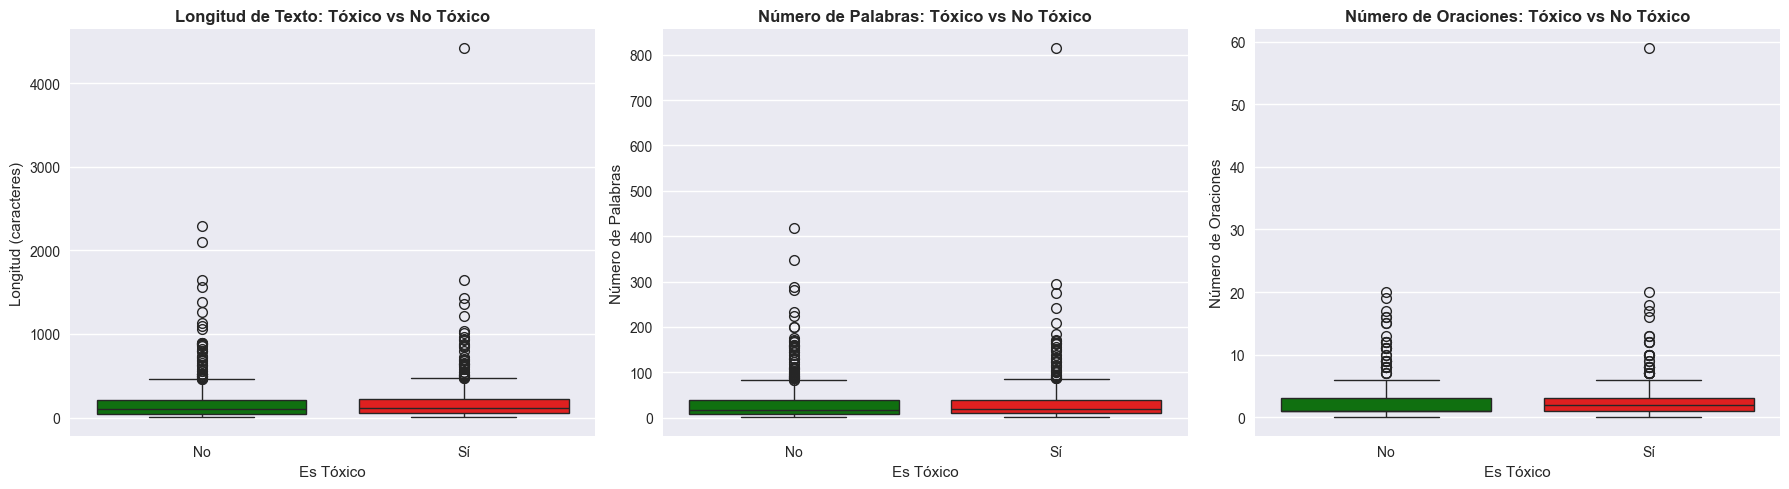

In [23]:
# Boxplots comparativos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot de longitud
df_melted = df.melt(id_vars=['IsToxic'], value_vars=['text_length'], 
                    var_name='metric', value_name='value')
sns.boxplot(data=df, x='IsToxic', y='text_length', ax=axes[0], palette=['green', 'red'])
axes[0].set_title('Longitud de Texto: Tóxico vs No Tóxico', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Es Tóxico', fontsize=11)
axes[0].set_ylabel('Longitud (caracteres)', fontsize=11)
axes[0].set_xticklabels(['No', 'Sí'])

# Boxplot de palabras
sns.boxplot(data=df, x='IsToxic', y='word_count', ax=axes[1], palette=['green', 'red'])
axes[1].set_title('Número de Palabras: Tóxico vs No Tóxico', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Es Tóxico', fontsize=11)
axes[1].set_ylabel('Número de Palabras', fontsize=11)
axes[1].set_xticklabels(['No', 'Sí'])

# Boxplot de oraciones
sns.boxplot(data=df, x='IsToxic', y='sentence_count', ax=axes[2], palette=['green', 'red'])
axes[2].set_title('Número de Oraciones: Tóxico vs No Tóxico', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Es Tóxico', fontsize=11)
axes[2].set_ylabel('Número de Oraciones', fontsize=11)
axes[2].set_xticklabels(['No', 'Sí'])

plt.tight_layout()
plt.show()


## 6. Análisis de ejemplos de comentarios

Vamos a ver algunos ejemplos de comentarios tóxicos y no tóxicos.


In [24]:
# Ejemplos de comentarios NO tóxicos
print("="*80)
print("EJEMPLOS DE COMENTARIOS NO TÓXICOS")
print("="*80)
non_toxic_samples = df[df['IsToxic'] == False]['Text'].head(3)
for i, text in enumerate(non_toxic_samples, 1):
    print(f"\nEjemplo {i}:")
    print(f"{text[:200]}..." if len(text) > 200 else text)
    print("-" * 80)


EJEMPLOS DE COMENTARIOS NO TÓXICOS

Ejemplo 1:
If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.  To lump yourself into this mess and take matters ...
--------------------------------------------------------------------------------

Ejemplo 2:
There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers is a ...
--------------------------------------------------------------------------------

Ejemplo 3:
The Arab dude is absolutely right, he should have not been shot 6 extra time. Shoot him once if hes attacking you and that would stop his attack. Shoot him twice if he's still attacking you, but six t...
--------------------------------------------------------------------------------


In [25]:
# Ejemplos de comentarios tóxicos con sus etiquetas
print("="*80)
print("EJEMPLOS DE COMENTARIOS TÓXICOS")
print("="*80)
toxic_samples = df[df['IsToxic'] == True].head(3)
for idx, row in toxic_samples.iterrows():
    print(f"\nEjemplo {idx + 1}:")
    print(f"Texto: {row['Text'][:200]}..." if len(row['Text']) > 200 else f"Texto: {row['Text']}")
    # Obtener las etiquetas activas
    active_labels = [label for label in label_columns if row[label] == True]
    print(f"Etiquetas: {', '.join(active_labels)}")
    print("-" * 80)


EJEMPLOS DE COMENTARIOS TÓXICOS

Ejemplo 2:
Texto: Law enforcement is not trained to shoot to apprehend.  They are trained to shoot to kill.  And I thank Wilson for killing that punk bitch.
Etiquetas: IsToxic, IsAbusive
--------------------------------------------------------------------------------

Ejemplo 3:
Texto: 
Dont you reckon them 'black lives matter' banners being held by white cunts is  kinda patronizing and ironically racist. could they have not come up with somethin better.. or is it just what white fo...
Etiquetas: IsToxic, IsAbusive, IsObscene
--------------------------------------------------------------------------------

Ejemplo 6:
Texto: here people his facebook is https://www.facebook.com/bassem.masri.520 he has ties with isis and other terrorist groups he is a muslim extremist 
Etiquetas: IsToxic, IsHatespeech, IsReligiousHate
--------------------------------------------------------------------------------


## 7. Análisis por VideoId

Vamos a ver si hay algún patrón relacionado con los videos.


In [26]:
# Número de videos únicos
print(f"Número de videos únicos: {df['VideoId'].nunique()}")
print(f"Número total de comentarios: {len(df)}")
print(f"Promedio de comentarios por video: {len(df) / df['VideoId'].nunique():.2f}")

# Comentarios por video
comments_per_video = df['VideoId'].value_counts()
print(f"\nVideos con más comentarios:")
print(comments_per_video.head(10))


Número de videos únicos: 13
Número total de comentarios: 1000
Promedio de comentarios por video: 76.92

Videos con más comentarios:
VideoId
9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
Name: count, dtype: int64


In [27]:
# Tasa de toxicidad por video
toxicity_by_video = df.groupby('VideoId').agg({
    'IsToxic': ['count', 'sum', 'mean']
}).round(3)
toxicity_by_video.columns = ['total_comments', 'toxic_comments', 'toxicity_rate']
toxicity_by_video = toxicity_by_video.sort_values('toxicity_rate', ascending=False)

print("Videos con mayor tasa de toxicidad:")
print(toxicity_by_video.head(10))


Videos con mayor tasa de toxicidad:
             total_comments  toxic_comments  toxicity_rate
VideoId                                                   
cT14IbTDW2c             146             108          0.740
04kJtp6pVXI             172             111          0.645
8HB18hZrhXc              38              23          0.605
Dt9-byUhPdg              34              17          0.500
dDbRyFIkNII              10               5          0.500
TZxEyoplYbI             104              50          0.481
bUgKZMSxr3E              39              18          0.462
5vF4si3hoRA               8               3          0.375
9pr1oE34bIM             274              88          0.321
#NAME?                   16               5          0.312


## 8. Resumen y Conclusiones

Resumen de los hallazgos principales del análisis exploratorio.


In [28]:
print("="*80)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("="*80)

print(f"\n1. DATASET:")
print(f"   - Total de comentarios: {len(df)}")
print(f"   - Total de videos: {df['VideoId'].nunique()}")
print(f"   - Columnas: {df.shape[1]}")

print(f"\n2. DISTRIBUCIÓN DE TOXICIDAD:")
toxic_count = df['IsToxic'].sum()
non_toxic_count = len(df) - toxic_count
print(f"   - Comentarios tóxicos: {toxic_count} ({toxic_count/len(df)*100:.2f}%)")
print(f"   - Comentarios no tóxicos: {non_toxic_count} ({non_toxic_count/len(df)*100:.2f}%)")

print(f"\n3. TIPOS DE TOXICIDAD MÁS COMUNES:")
sub_label_counts = [(col, df[col].sum()) for col in sub_labels]
sub_label_counts.sort(key=lambda x: x[1], reverse=True)
for label, count in sub_label_counts[:5]:
    print(f"   - {label}: {count} ({count/len(df)*100:.2f}%)")

print(f"\n4. CARACTERÍSTICAS DEL TEXTO:")
print(f"   - Longitud promedio: {df['text_length'].mean():.1f} caracteres")
print(f"   - Palabras promedio: {df['word_count'].mean():.1f} palabras")
print(f"   - Longitud promedio (tóxicos): {df[df['IsToxic']==True]['text_length'].mean():.1f} caracteres")
print(f"   - Longitud promedio (no tóxicos): {df[df['IsToxic']==False]['text_length'].mean():.1f} caracteres")

print(f"\n5. MULTI-ETIQUETADO:")
print(f"   - Comentarios con múltiples etiquetas: {(df['num_labels'] > 1).sum()}")
print(f"   - Promedio de etiquetas por comentario tóxico: {df[df['IsToxic']==True]['num_labels'].mean():.2f}")

print("\n" + "="*80)


RESUMEN DEL ANÁLISIS EXPLORATORIO

1. DATASET:
   - Total de comentarios: 1000
   - Total de videos: 13
   - Columnas: 19

2. DISTRIBUCIÓN DE TOXICIDAD:
   - Comentarios tóxicos: 462 (46.20%)
   - Comentarios no tóxicos: 538 (53.80%)

3. TIPOS DE TOXICIDAD MÁS COMUNES:
   - IsAbusive: 353 (35.30%)
   - IsProvocative: 161 (16.10%)
   - IsHatespeech: 138 (13.80%)
   - IsRacist: 125 (12.50%)
   - IsObscene: 100 (10.00%)

4. CARACTERÍSTICAS DEL TEXTO:
   - Longitud promedio: 185.6 caracteres
   - Palabras promedio: 33.8 palabras
   - Longitud promedio (tóxicos): 189.4 caracteres
   - Longitud promedio (no tóxicos): 182.3 caracteres

5. MULTI-ETIQUETADO:
   - Comentarios con múltiples etiquetas: 462
   - Promedio de etiquetas por comentario tóxico: 2.99

